In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11339631162363853584
xla_global_id: -1
]


In [3]:
# MAX_VNUM = 20000
SEQUENCE_LENGTH = 300
EMBED_DIMENSION = 100
BATCH_SIZE = 64
K_FOLD = 5

In [4]:
column_names = ["lemmatized_clean_final_article", "labels"]
data = pd.read_csv("../Data_Preprocessing/Preprocessed_Dataset/Fakes_Preprocessed_Data.csv", encoding='utf-8', encoding_errors='ignore')[column_names]
train, test = train_test_split(data, test_size=0.2)

In [5]:
token = keras.preprocessing.text.Tokenizer()
token.fit_on_texts(data[column_names[0]])
vocab_size = len(token.word_index) + 2

In [6]:
embedding_vector = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in tqdm(f):
    word, coefs = line.split(maxsplit=1)
    coefs = np.fromstring(coefs, "f", sep=" ")
    embedding_vector[word] = coefs
embedding_matrix = np.zeros((vocab_size, EMBED_DIMENSION))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

0it [00:00, ?it/s]

4762it [00:00, 47149.71it/s]

9540it [00:00, 47242.17it/s]

14386it [00:00, 47579.26it/s]

19144it [00:00, 47209.04it/s]

23866it [00:00, 46877.78it/s]

28591it [00:00, 46845.13it/s]

33380it [00:00, 47031.34it/s]

38189it [00:00, 47365.38it/s]

43000it [00:00, 47592.56it/s]

47760it [00:01, 47417.88it/s]

52503it [00:01, 47421.55it/s]

57287it [00:01, 47404.72it/s]

62029it [00:01, 47408.19it/s]

66823it [00:01, 47425.20it/s]

71643it [00:01, 47515.42it/s]

76395it [00:01, 47374.92it/s]

81171it [00:01, 47348.51it/s]

85969it [00:01, 47395.55it/s]

90709it [00:01, 47115.66it/s]

95476it [00:02, 47140.37it/s]

100213it [00:02, 47208.69it/s]

104994it [00:02, 47247.19it/s]

109804it [00:02, 47360.25it/s]

114600it [00:02, 47397.64it/s]

119409it [00:02, 47462.43it/s]

124197it [00:02, 47445.74it/s]

128952it [00:02, 47476.65it/s]

133729it [00:02, 47564.22it/s]

138486it [00:02, 47565.86it/s]

143243it [00:03, 47425.38it/s]

147986it [00:03, 47285.45it/s]

152715it [00:03, 47286.62it/s]

157512it [00:03, 47349.54it/s]

162259it [00:03, 47385.36it/s]

167039it [00:03, 47367.83it/s]

171793it [00:03, 47278.09it/s]

176521it [00:03, 46446.85it/s]

181308it [00:03, 46729.04it/s]

186088it [00:03, 46907.21it/s]

190832it [00:04, 46926.01it/s]

195533it [00:04, 46950.93it/s]

200229it [00:04, 46953.58it/s]

205003it [00:04, 47048.02it/s]

209780it [00:04, 47122.85it/s]

214539it [00:04, 47121.56it/s]

219318it [00:04, 47180.27it/s]

224037it [00:04, 47183.15it/s]

228819it [00:04, 47232.28it/s]

233580it [00:04, 47204.15it/s]

238333it [00:05, 47160.67it/s]

243085it [00:05, 47127.28it/s]

247798it [00:05, 47128.07it/s]

252511it [00:05, 47128.49it/s]

257224it [00:05, 46988.51it/s]

261966it [00:05, 46977.17it/s]

266668it [00:05, 46850.14it/s]

271367it [00:05, 46891.77it/s]

276085it [00:05, 46977.85it/s]

280867it [00:05, 47089.01it/s]

285624it [00:06, 47092.04it/s]

290334it [00:06, 47094.33it/s]

295044it [00:06, 46955.73it/s]

299759it [00:06, 46873.75it/s]

304505it [00:06, 46908.71it/s]

309251it [00:06, 46933.18it/s]

313945it [00:06, 46795.61it/s]

318666it [00:06, 46779.78it/s]

323354it [00:06, 46809.59it/s]

328137it [00:06, 46973.76it/s]

332877it [00:07, 46961.14it/s]

337574it [00:07, 46963.76it/s]

342271it [00:07, 46825.74it/s]

346954it [00:07, 46826.99it/s]

351637it [00:07, 45206.07it/s]

356383it [00:07, 45730.62it/s]

361111it [00:07, 46185.63it/s]

365809it [00:07, 46420.26it/s]

370597it [00:07, 46715.16it/s]

375273it [00:07, 46728.34it/s]

379969it [00:08, 46658.45it/s]

384661it [00:08, 46736.24it/s]

389337it [00:08, 46604.30it/s]

394073it [00:08, 46690.46it/s]

398818it [00:08, 46777.47it/s]

400000it [00:08, 47035.30it/s]

  0%|          | 0/10014 [00:00<?, ?it/s]

100%|██████████| 10014/10014 [00:00<00:00, 2004570.24it/s]

### Model

In [7]:
def model_generator():
    model = keras.models.Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, output_dim=EMBED_DIMENSION, 
                        embeddings_initializer=keras.initializers.Constant(embedding_matrix), 
                        input_length=SEQUENCE_LENGTH, trainable = False))
    model.add(layers.Permute((2, 1)))
    model.add(layers.Conv1D(128, 5, activation='relu', name="Conv1D"))
    model.add(layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
    model.add(layers.Flatten())
    # model.add(layers.LSTM(32, activation=None, name="LSTM"))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[
        "accuracy",
        tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
    ])
    return model

In [8]:
train_x = token.texts_to_sequences(train[column_names[0]])
train_x = keras.preprocessing.sequence.pad_sequences(train_x, maxlen=SEQUENCE_LENGTH, padding='post', truncating="post")
train_y = train[column_names[1]]


In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = K_FOLD)
history = {}
loss, accuracy, precision, recall, F1 = np.zeros(K_FOLD), np.zeros(K_FOLD), np.zeros(K_FOLD), np.zeros(K_FOLD), np.zeros(K_FOLD)
id = 0
epochs = 10
test_x = token.texts_to_sequences(test[column_names[0]])
test_x = keras.preprocessing.sequence.pad_sequences(test_x, maxlen=SEQUENCE_LENGTH, padding='post', truncating="post")
test_y = test[column_names[1]]
best_model = None
best_f1 = 0
best_id = 0
for train_index, val_index in kf.split(train_x, train_y):
    training_x, training_y = train_x[train_index], train_y.iloc[train_index]
    validation_x, validation_y = train_x[val_index], train_y.iloc[val_index]
    model = model_generator()
    history[id] = model.fit(x=training_x, y=training_y, validation_data=(validation_x, validation_y),
                                               epochs=epochs, batch_size=BATCH_SIZE)
    loss[id], accuracy[id], precision[id], recall[id] = model.evaluate(x=test_x, y=test_y)
    F1[id] = 2 * (precision[id] * recall[id]) / (precision[id] + recall[id])
    if F1[id] > best_f1:
        best_model = model
        best_f1 = F1[id]
        best_id = id
    id += 1
print("Best Model: Model_{}".format(best_id))

Epoch 1/10


1/9 [==>...........................] - ETA: 4s - loss: 0.6722 - accuracy: 0.6094 - precision: 0.5385 - recall: 0.2692

4/9 [============>.................] - ETA: 0s - loss: 0.7145 - accuracy: 0.5156 - precision: 0.4722 - recall: 0.4322

7/9 [======================>.......] - ETA: 0s - loss: 0.7214 - accuracy: 0.5223 - precision: 0.5304 - recall: 0.5721

9/9 [==============================] - 1s 55ms/step - loss: 0.7223 - accuracy: 0.5136 - precision: 0.5284 - recall: 0.5918 - val_loss: 0.7181 - val_accuracy: 0.5271 - val_precision: 0.5195 - val_recall: 0.6250


Epoch 2/10


1/9 [==>...........................] - ETA: 0s - loss: 0.4994 - accuracy: 0.8281 - precision: 0.8065 - recall: 0.8333

4/9 [============>.................] - ETA: 0s - loss: 0.5326 - accuracy: 0.7656 - precision: 0.9186 - recall: 0.5985

7/9 [======================>.......] - ETA: 0s - loss: 0.5337 - accuracy: 0.7545 - precision: 0.8805 - recall: 0.6061

9/9 [==============================] - 0s 28ms/step - loss: 0.5320 - accuracy: 0.7471 - precision: 0.8408 - recall: 0.6330 - val_loss: 0.8050 - val_accuracy: 0.5039 - val_precision: 0.5000 - val_recall: 0.7812


Epoch 3/10


1/9 [==>...........................] - ETA: 0s - loss: 0.4402 - accuracy: 0.8125 - precision: 0.7381 - recall: 0.9688

4/9 [============>.................] - ETA: 0s - loss: 0.4321 - accuracy: 0.8477 - precision: 0.8425 - recall: 0.8849

7/9 [======================>.......] - ETA: 0s - loss: 0.4339 - accuracy: 0.8527 - precision: 0.8664 - recall: 0.8517

9/9 [==============================] - 0s 25ms/step - loss: 0.4337 - accuracy: 0.8502 - precision: 0.8740 - recall: 0.8315 - val_loss: 0.8075 - val_accuracy: 0.4884 - val_precision: 0.4583 - val_recall: 0.1719


Epoch 4/10


1/9 [==>...........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.8750 - precision: 0.9600 - recall: 0.7742

4/9 [============>.................] - ETA: 0s - loss: 0.4084 - accuracy: 0.8242 - precision: 0.9882 - recall: 0.6562

7/9 [======================>.......] - ETA: 0s - loss: 0.3881 - accuracy: 0.8438 - precision: 0.9605 - recall: 0.7296

9/9 [==============================] - 0s 26ms/step - loss: 0.3891 - accuracy: 0.8405 - precision: 0.9343 - recall: 0.7453 - val_loss: 0.8933 - val_accuracy: 0.4961 - val_precision: 0.4949 - val_recall: 0.7656


Epoch 5/10


1/9 [==>...........................] - ETA: 0s - loss: 0.4285 - accuracy: 0.8125 - precision: 0.7250 - recall: 0.9667

4/9 [============>.................] - ETA: 0s - loss: 0.3344 - accuracy: 0.8984 - precision: 0.8645 - recall: 0.9640

7/9 [======================>.......] - ETA: 0s - loss: 0.3200 - accuracy: 0.9107 - precision: 0.8926 - recall: 0.9391

9/9 [==============================] - 0s 26ms/step - loss: 0.3236 - accuracy: 0.9105 - precision: 0.9018 - recall: 0.9288 - val_loss: 0.8228 - val_accuracy: 0.5194 - val_precision: 0.5278 - val_recall: 0.2969


Epoch 6/10


1/9 [==>...........................] - ETA: 0s - loss: 0.3328 - accuracy: 0.8594 - precision: 1.0000 - recall: 0.7188

4/9 [============>.................] - ETA: 0s - loss: 0.3071 - accuracy: 0.9023 - precision: 1.0000 - recall: 0.8031

7/9 [======================>.......] - ETA: 0s - loss: 0.2766 - accuracy: 0.9263 - precision: 0.9757 - recall: 0.8777

9/9 [==============================] - 0s 26ms/step - loss: 0.2724 - accuracy: 0.9319 - precision: 0.9754 - recall: 0.8914 - val_loss: 0.8384 - val_accuracy: 0.4884 - val_precision: 0.4875 - val_recall: 0.6094


Epoch 7/10


1/9 [==>...........................] - ETA: 0s - loss: 0.2645 - accuracy: 0.9219 - precision: 0.8824 - recall: 0.9677

3/9 [=========>....................] - ETA: 0s - loss: 0.2299 - accuracy: 0.9479 - precision: 0.9346 - recall: 0.9709

6/9 [===================>..........] - ETA: 0s - loss: 0.2165 - accuracy: 0.9531 - precision: 0.9536 - recall: 0.9536

9/9 [==============================] - 0s 26ms/step - loss: 0.2142 - accuracy: 0.9611 - precision: 0.9660 - recall: 0.9588 - val_loss: 0.8667 - val_accuracy: 0.4806 - val_precision: 0.4727 - val_recall: 0.4062


Epoch 8/10


1/9 [==>...........................] - ETA: 0s - loss: 0.2018 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.1708 - accuracy: 0.9844 - precision: 0.9856 - recall: 0.9856

7/9 [======================>.......] - ETA: 0s - loss: 0.1730 - accuracy: 0.9844 - precision: 0.9868 - recall: 0.9825

9/9 [==============================] - 0s 26ms/step - loss: 0.1820 - accuracy: 0.9767 - precision: 0.9811 - recall: 0.9738 - val_loss: 0.9299 - val_accuracy: 0.4884 - val_precision: 0.4872 - val_recall: 0.5938


Epoch 9/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1304 - accuracy: 0.9844 - precision: 1.0000 - recall: 0.9737

4/9 [============>.................] - ETA: 0s - loss: 0.1475 - accuracy: 0.9883 - precision: 0.9855 - recall: 0.9927

7/9 [======================>.......] - ETA: 0s - loss: 0.1512 - accuracy: 0.9799 - precision: 0.9711 - recall: 0.9916

9/9 [==============================] - 0s 26ms/step - loss: 0.1522 - accuracy: 0.9786 - precision: 0.9672 - recall: 0.9925 - val_loss: 0.9446 - val_accuracy: 0.5039 - val_precision: 0.5000 - val_recall: 0.4844


Epoch 10/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1444 - accuracy: 0.9531 - precision: 0.9737 - recall: 0.9487

4/9 [============>.................] - ETA: 0s - loss: 0.1249 - accuracy: 0.9805 - precision: 0.9852 - recall: 0.9779

7/9 [======================>.......] - ETA: 0s - loss: 0.1320 - accuracy: 0.9777 - precision: 0.9868 - recall: 0.9697

9/9 [==============================] - 0s 26ms/step - loss: 0.1271 - accuracy: 0.9805 - precision: 0.9886 - recall: 0.9738 - val_loss: 0.9920 - val_accuracy: 0.5039 - val_precision: 0.5000 - val_recall: 0.5312


1/6 [====>.........................] - ETA: 0s - loss: 0.9351 - accuracy: 0.5000 - precision: 0.5333 - recall: 0.4706

6/6 [==============================] - 0s 4ms/step - loss: 1.0636 - accuracy: 0.4596 - precision: 0.5556 - recall: 0.4211


Epoch 1/10


1/9 [==>...........................] - ETA: 3s - loss: 0.7039 - accuracy: 0.5312 - precision_1: 0.5000 - recall_1: 0.2667

4/9 [============>.................] - ETA: 0s - loss: 0.7702 - accuracy: 0.4805 - precision_1: 0.5000 - recall_1: 0.5263

7/9 [======================>.......] - ETA: 0s - loss: 0.7640 - accuracy: 0.4777 - precision_1: 0.4904 - recall_1: 0.5590

9/9 [==============================] - 1s 50ms/step - loss: 0.7673 - accuracy: 0.4650 - precision_1: 0.4848 - recall_1: 0.4794 - val_loss: 0.7889 - val_accuracy: 0.5116 - val_precision_1: 0.6667 - val_recall_1: 0.0312


Epoch 2/10


1/9 [==>...........................] - ETA: 0s - loss: 0.5705 - accuracy: 0.5938 - precision_1: 0.8000 - recall_1: 0.1379

3/9 [=========>....................] - ETA: 0s - loss: 0.5779 - accuracy: 0.5990 - precision_1: 0.8636 - recall_1: 0.2043

6/9 [===================>..........] - ETA: 0s - loss: 0.5485 - accuracy: 0.7031 - precision_1: 0.8725 - recall_1: 0.4684

9/9 [==============================] - ETA: 0s - loss: 0.5409 - accuracy: 0.7257 - precision_1: 0.8150 - recall_1: 0.6105

9/9 [==============================] - 0s 28ms/step - loss: 0.5409 - accuracy: 0.7257 - precision_1: 0.8150 - recall_1: 0.6105 - val_loss: 0.8378 - val_accuracy: 0.4961 - val_precision_1: 0.4960 - val_recall_1: 0.9688


Epoch 3/10


1/9 [==>...........................] - ETA: 0s - loss: 0.4947 - accuracy: 0.6875 - precision_1: 0.6429 - recall_1: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.4940 - accuracy: 0.6914 - precision_1: 0.6500 - recall_1: 0.9862

7/9 [======================>.......] - ETA: 0s - loss: 0.4666 - accuracy: 0.7701 - precision_1: 0.7069 - recall_1: 0.9750

9/9 [==============================] - 0s 25ms/step - loss: 0.4632 - accuracy: 0.7802 - precision_1: 0.7188 - recall_1: 0.9476 - val_loss: 0.8344 - val_accuracy: 0.4806 - val_precision_1: 0.4118 - val_recall_1: 0.1094


Epoch 4/10


1/9 [==>...........................] - ETA: 0s - loss: 0.4679 - accuracy: 0.7344 - precision_1: 0.9500 - recall_1: 0.5429

4/9 [============>.................] - ETA: 0s - loss: 0.4009 - accuracy: 0.8438 - precision_1: 0.9700 - recall_1: 0.7239

7/9 [======================>.......] - ETA: 0s - loss: 0.3802 - accuracy: 0.8638 - precision_1: 0.9143 - recall_1: 0.8170

9/9 [==============================] - 0s 25ms/step - loss: 0.3809 - accuracy: 0.8638 - precision_1: 0.8956 - recall_1: 0.8352 - val_loss: 0.8379 - val_accuracy: 0.5194 - val_precision_1: 0.5104 - val_recall_1: 0.7656


Epoch 5/10


1/9 [==>...........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.8750 - precision_1: 0.8293 - recall_1: 0.9714

4/9 [============>.................] - ETA: 0s - loss: 0.3354 - accuracy: 0.8945 - precision_1: 0.8446 - recall_1: 0.9690

7/9 [======================>.......] - ETA: 0s - loss: 0.3160 - accuracy: 0.9174 - precision_1: 0.8880 - recall_1: 0.9664

9/9 [==============================] - 0s 25ms/step - loss: 0.3113 - accuracy: 0.9183 - precision_1: 0.8920 - recall_1: 0.9588 - val_loss: 0.8616 - val_accuracy: 0.4729 - val_precision_1: 0.4600 - val_recall_1: 0.3594


Epoch 6/10


1/9 [==>...........................] - ETA: 0s - loss: 0.2149 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.2492 - accuracy: 0.9609 - precision_1: 1.0000 - recall_1: 0.9231

7/9 [======================>.......] - ETA: 0s - loss: 0.2514 - accuracy: 0.9509 - precision_1: 0.9649 - recall_1: 0.9402

9/9 [==============================] - 0s 26ms/step - loss: 0.2532 - accuracy: 0.9475 - precision_1: 0.9580 - recall_1: 0.9401 - val_loss: 0.8961 - val_accuracy: 0.4419 - val_precision_1: 0.4500 - val_recall_1: 0.5625


Epoch 7/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1794 - accuracy: 0.9688 - precision_1: 0.9429 - recall_1: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.2018 - accuracy: 0.9609 - precision_1: 0.9478 - recall_1: 0.9769

7/9 [======================>.......] - ETA: 0s - loss: 0.2110 - accuracy: 0.9509 - precision_1: 0.9478 - recall_1: 0.9561

9/9 [==============================] - 0s 24ms/step - loss: 0.2091 - accuracy: 0.9514 - precision_1: 0.9515 - recall_1: 0.9551 - val_loss: 0.9390 - val_accuracy: 0.4651 - val_precision_1: 0.4528 - val_recall_1: 0.3750


Epoch 8/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1853 - accuracy: 0.9375 - precision_1: 0.9643 - recall_1: 0.9000

4/9 [============>.................] - ETA: 0s - loss: 0.1765 - accuracy: 0.9609 - precision_1: 0.9917 - recall_1: 0.9297

7/9 [======================>.......] - ETA: 0s - loss: 0.1729 - accuracy: 0.9598 - precision_1: 0.9780 - recall_1: 0.9447

9/9 [==============================] - 0s 24ms/step - loss: 0.1754 - accuracy: 0.9591 - precision_1: 0.9731 - recall_1: 0.9476 - val_loss: 0.9692 - val_accuracy: 0.4419 - val_precision_1: 0.4474 - val_recall_1: 0.5312


Epoch 9/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1237 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.1411 - accuracy: 0.9766 - precision_1: 0.9774 - recall_1: 0.9774

7/9 [======================>.......] - ETA: 0s - loss: 0.1440 - accuracy: 0.9732 - precision_1: 0.9700 - recall_1: 0.9784

9/9 [==============================] - 0s 24ms/step - loss: 0.1418 - accuracy: 0.9747 - precision_1: 0.9739 - recall_1: 0.9775 - val_loss: 1.0050 - val_accuracy: 0.4496 - val_precision_1: 0.4493 - val_recall_1: 0.4844


Epoch 10/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1002 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.1381 - accuracy: 0.9922 - precision_1: 0.9853 - recall_1: 1.0000

7/9 [======================>.......] - ETA: 0s - loss: 0.1404 - accuracy: 0.9844 - precision_1: 0.9754 - recall_1: 0.9958

9/9 [==============================] - 0s 24ms/step - loss: 0.1379 - accuracy: 0.9844 - precision_1: 0.9744 - recall_1: 0.9963 - val_loss: 1.0497 - val_accuracy: 0.4109 - val_precision_1: 0.4189 - val_recall_1: 0.4844


1/6 [====>.........................] - ETA: 0s - loss: 0.7612 - accuracy: 0.5625 - precision_1: 0.5789 - recall_1: 0.6471

6/6 [==============================] - 0s 4ms/step - loss: 0.9355 - accuracy: 0.4720 - precision_1: 0.5568 - recall_1: 0.5158


Epoch 1/10


1/9 [==>...........................] - ETA: 4s - loss: 0.7015 - accuracy: 0.4062 - precision_2: 0.3889 - recall_2: 0.4667

4/9 [============>.................] - ETA: 0s - loss: 0.7194 - accuracy: 0.4688 - precision_2: 0.4754 - recall_2: 0.4462

7/9 [======================>.......] - ETA: 0s - loss: 0.7357 - accuracy: 0.4576 - precision_2: 0.4643 - recall_2: 0.5200

9/9 [==============================] - 1s 50ms/step - loss: 0.7416 - accuracy: 0.4591 - precision_2: 0.4612 - recall_2: 0.4612 - val_loss: 0.7602 - val_accuracy: 0.4341 - val_precision_2: 0.5000 - val_recall_2: 0.1370


Epoch 2/10


1/9 [==>...........................] - ETA: 0s - loss: 0.5890 - accuracy: 0.6875 - precision_2: 0.8636 - recall_2: 0.5278

4/9 [============>.................] - ETA: 0s - loss: 0.5422 - accuracy: 0.7539 - precision_2: 0.7698 - recall_2: 0.7405

7/9 [======================>.......] - ETA: 0s - loss: 0.5349 - accuracy: 0.7388 - precision_2: 0.7048 - recall_2: 0.8377

9/9 [==============================] - 0s 27ms/step - loss: 0.5355 - accuracy: 0.7374 - precision_2: 0.6965 - recall_2: 0.8450 - val_loss: 0.7703 - val_accuracy: 0.4651 - val_precision_2: 0.5370 - val_recall_2: 0.3973


Epoch 3/10


1/9 [==>...........................] - ETA: 0s - loss: 0.4517 - accuracy: 0.8125 - precision_2: 0.8148 - recall_2: 0.7586

4/9 [============>.................] - ETA: 0s - loss: 0.4649 - accuracy: 0.8242 - precision_2: 0.8952 - recall_2: 0.7344

7/9 [======================>.......] - ETA: 0s - loss: 0.4430 - accuracy: 0.8571 - precision_2: 0.8812 - recall_2: 0.8165

9/9 [==============================] - 0s 24ms/step - loss: 0.4362 - accuracy: 0.8619 - precision_2: 0.8816 - recall_2: 0.8372 - val_loss: 0.8068 - val_accuracy: 0.4961 - val_precision_2: 0.5364 - val_recall_2: 0.8082


Epoch 4/10


1/9 [==>...........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8594 - precision_2: 0.7805 - recall_2: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.4554 - accuracy: 0.7695 - precision_2: 0.6722 - recall_2: 1.0000

7/9 [======================>.......] - ETA: 0s - loss: 0.4148 - accuracy: 0.8259 - precision_2: 0.7543 - recall_2: 0.9689

9/9 [==============================] - 0s 24ms/step - loss: 0.4091 - accuracy: 0.8327 - precision_2: 0.7671 - recall_2: 0.9574 - val_loss: 0.8945 - val_accuracy: 0.4884 - val_precision_2: 0.5946 - val_recall_2: 0.3014


Epoch 5/10


1/9 [==>...........................] - ETA: 0s - loss: 0.3104 - accuracy: 0.9219 - precision_2: 0.9643 - recall_2: 0.8710

4/9 [============>.................] - ETA: 0s - loss: 0.3672 - accuracy: 0.8516 - precision_2: 0.9474 - recall_2: 0.7317

7/9 [======================>.......] - ETA: 0s - loss: 0.3431 - accuracy: 0.8817 - precision_2: 0.9381 - recall_2: 0.8161

9/9 [==============================] - 0s 24ms/step - loss: 0.3455 - accuracy: 0.8813 - precision_2: 0.9191 - recall_2: 0.8372 - val_loss: 0.9120 - val_accuracy: 0.5116 - val_precision_2: 0.5455 - val_recall_2: 0.8219


Epoch 6/10


1/9 [==>...........................] - ETA: 0s - loss: 0.3275 - accuracy: 0.8906 - precision_2: 0.8372 - recall_2: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8555 - precision_2: 0.7836 - recall_2: 1.0000

7/9 [======================>.......] - ETA: 0s - loss: 0.3215 - accuracy: 0.8795 - precision_2: 0.8111 - recall_2: 0.9865

9/9 [==============================] - 0s 24ms/step - loss: 0.3166 - accuracy: 0.8891 - precision_2: 0.8295 - recall_2: 0.9806 - val_loss: 0.9530 - val_accuracy: 0.4341 - val_precision_2: 0.5000 - val_recall_2: 0.2603


Epoch 7/10


1/9 [==>...........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.9062 - precision_2: 0.9667 - recall_2: 0.8529

4/9 [============>.................] - ETA: 0s - loss: 0.2652 - accuracy: 0.9258 - precision_2: 0.9758 - recall_2: 0.8832

7/9 [======================>.......] - ETA: 0s - loss: 0.2487 - accuracy: 0.9442 - precision_2: 0.9679 - recall_2: 0.9214

9/9 [==============================] - 0s 24ms/step - loss: 0.2415 - accuracy: 0.9514 - precision_2: 0.9717 - recall_2: 0.9302 - val_loss: 0.9173 - val_accuracy: 0.4806 - val_precision_2: 0.5357 - val_recall_2: 0.6164


Epoch 8/10


1/9 [==>...........................] - ETA: 0s - loss: 0.2168 - accuracy: 0.9688 - precision_2: 0.9412 - recall_2: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.1959 - accuracy: 0.9688 - precision_2: 0.9760 - recall_2: 0.9606

7/9 [======================>.......] - ETA: 0s - loss: 0.1954 - accuracy: 0.9688 - precision_2: 0.9773 - recall_2: 0.9598

9/9 [==============================] - 0s 24ms/step - loss: 0.1927 - accuracy: 0.9728 - precision_2: 0.9803 - recall_2: 0.9651 - val_loss: 0.9608 - val_accuracy: 0.4264 - val_precision_2: 0.4909 - val_recall_2: 0.3699


Epoch 9/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1859 - accuracy: 0.9688 - precision_2: 0.9643 - recall_2: 0.9643

4/9 [============>.................] - ETA: 0s - loss: 0.1664 - accuracy: 0.9805 - precision_2: 0.9851 - recall_2: 0.9778

7/9 [======================>.......] - ETA: 0s - loss: 0.1617 - accuracy: 0.9777 - precision_2: 0.9866 - recall_2: 0.9693

9/9 [==============================] - 0s 24ms/step - loss: 0.1661 - accuracy: 0.9747 - precision_2: 0.9842 - recall_2: 0.9651 - val_loss: 0.9765 - val_accuracy: 0.4729 - val_precision_2: 0.5352 - val_recall_2: 0.5205


Epoch 10/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1130 - accuracy: 0.9844 - precision_2: 0.9722 - recall_2: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.1357 - accuracy: 0.9766 - precision_2: 0.9789 - recall_2: 0.9789

7/9 [======================>.......] - ETA: 0s - loss: 0.1299 - accuracy: 0.9799 - precision_2: 0.9820 - recall_2: 0.9776

9/9 [==============================] - 0s 24ms/step - loss: 0.1348 - accuracy: 0.9805 - precision_2: 0.9844 - recall_2: 0.9767 - val_loss: 0.9960 - val_accuracy: 0.4651 - val_precision_2: 0.5323 - val_recall_2: 0.4521


1/6 [====>.........................] - ETA: 0s - loss: 0.7587 - accuracy: 0.5312 - precision_2: 0.5625 - recall_2: 0.5294

6/6 [==============================] - 0s 4ms/step - loss: 1.0351 - accuracy: 0.4161 - precision_2: 0.5063 - recall_2: 0.4211


Epoch 1/10


1/9 [==>...........................] - ETA: 3s - loss: 0.7130 - accuracy: 0.4844 - precision_3: 0.4595 - recall_3: 0.5667

4/9 [============>.................] - ETA: 0s - loss: 0.7130 - accuracy: 0.5117 - precision_3: 0.5113 - recall_3: 0.5312

7/9 [======================>.......] - ETA: 0s - loss: 0.7169 - accuracy: 0.5045 - precision_3: 0.5121 - recall_3: 0.5570

9/9 [==============================] - 1s 49ms/step - loss: 0.7189 - accuracy: 0.5029 - precision_3: 0.5093 - recall_3: 0.5249 - val_loss: 0.7604 - val_accuracy: 0.4766 - val_precision_3: 0.5172 - val_recall_3: 0.6429


Epoch 2/10


1/9 [==>...........................] - ETA: 0s - loss: 0.4891 - accuracy: 0.8594 - precision_3: 0.7750 - recall_3: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.5235 - accuracy: 0.7344 - precision_3: 0.6631 - recall_3: 0.9612

7/9 [======================>.......] - ETA: 0s - loss: 0.5135 - accuracy: 0.7656 - precision_3: 0.7010 - recall_3: 0.9336

9/9 [==============================] - 0s 27ms/step - loss: 0.5091 - accuracy: 0.7689 - precision_3: 0.7152 - recall_3: 0.9042 - val_loss: 0.8436 - val_accuracy: 0.4688 - val_precision_3: 0.5227 - val_recall_3: 0.3286


Epoch 3/10


1/9 [==>...........................] - ETA: 0s - loss: 0.4608 - accuracy: 0.8438 - precision_3: 0.8125 - recall_3: 0.8667

4/9 [============>.................] - ETA: 0s - loss: 0.4216 - accuracy: 0.8867 - precision_3: 0.8537 - recall_3: 0.9052

7/9 [======================>.......] - ETA: 0s - loss: 0.4131 - accuracy: 0.8728 - precision_3: 0.8403 - recall_3: 0.9132

9/9 [==============================] - 0s 25ms/step - loss: 0.4087 - accuracy: 0.8718 - precision_3: 0.8421 - recall_3: 0.9195 - val_loss: 0.8734 - val_accuracy: 0.4297 - val_precision_3: 0.4810 - val_recall_3: 0.5429


Epoch 4/10


1/9 [==>...........................] - ETA: 0s - loss: 0.3294 - accuracy: 0.9531 - precision_3: 0.9091 - recall_3: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8789 - precision_3: 0.8538 - recall_3: 0.9024

7/9 [======================>.......] - ETA: 0s - loss: 0.3548 - accuracy: 0.8862 - precision_3: 0.8969 - recall_3: 0.8772

9/9 [==============================] - 0s 24ms/step - loss: 0.3545 - accuracy: 0.8854 - precision_3: 0.8976 - recall_3: 0.8736 - val_loss: 0.9645 - val_accuracy: 0.4062 - val_precision_3: 0.4595 - val_recall_3: 0.4857


Epoch 5/10


1/9 [==>...........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.9531 - precision_3: 0.9429 - recall_3: 0.9706

4/9 [============>.................] - ETA: 0s - loss: 0.2925 - accuracy: 0.9414 - precision_3: 0.9333 - recall_3: 0.9545

7/9 [======================>.......] - ETA: 0s - loss: 0.2920 - accuracy: 0.9375 - precision_3: 0.9437 - recall_3: 0.9356

9/9 [==============================] - 0s 24ms/step - loss: 0.2884 - accuracy: 0.9340 - precision_3: 0.9382 - recall_3: 0.9310 - val_loss: 1.0613 - val_accuracy: 0.4297 - val_precision_3: 0.4694 - val_recall_3: 0.3286


Epoch 6/10


1/9 [==>...........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.9688 - precision_3: 1.0000 - recall_3: 0.9394

4/9 [============>.................] - ETA: 0s - loss: 0.2598 - accuracy: 0.9180 - precision_3: 0.9826 - recall_3: 0.8561

7/9 [======================>.......] - ETA: 0s - loss: 0.2641 - accuracy: 0.9263 - precision_3: 0.9849 - recall_3: 0.8673

9/9 [==============================] - 0s 23ms/step - loss: 0.2603 - accuracy: 0.9320 - precision_3: 0.9829 - recall_3: 0.8812 - val_loss: 1.1309 - val_accuracy: 0.4141 - val_precision_3: 0.4699 - val_recall_3: 0.5571


Epoch 7/10


1/9 [==>...........................] - ETA: 0s - loss: 0.2370 - accuracy: 0.9531 - precision_3: 0.9231 - recall_3: 0.9600

4/9 [============>.................] - ETA: 0s - loss: 0.2295 - accuracy: 0.9648 - precision_3: 0.9624 - recall_3: 0.9697

7/9 [======================>.......] - ETA: 0s - loss: 0.2306 - accuracy: 0.9509 - precision_3: 0.9362 - recall_3: 0.9692

9/9 [==============================] - 0s 24ms/step - loss: 0.2230 - accuracy: 0.9553 - precision_3: 0.9440 - recall_3: 0.9693 - val_loss: 1.1558 - val_accuracy: 0.4297 - val_precision_3: 0.4717 - val_recall_3: 0.3571


Epoch 8/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1453 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.1577 - accuracy: 0.9766 - precision_3: 0.9767 - recall_3: 0.9767

7/9 [======================>.......] - ETA: 0s - loss: 0.1767 - accuracy: 0.9732 - precision_3: 0.9778 - recall_3: 0.9692

9/9 [==============================] - 0s 24ms/step - loss: 0.1770 - accuracy: 0.9689 - precision_3: 0.9693 - recall_3: 0.9693 - val_loss: 1.1721 - val_accuracy: 0.4297 - val_precision_3: 0.4800 - val_recall_3: 0.5143


Epoch 9/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1414 - accuracy: 0.9688 - precision_3: 0.9394 - recall_3: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.1800 - accuracy: 0.9570 - precision_3: 0.9362 - recall_3: 0.9851

7/9 [======================>.......] - ETA: 0s - loss: 0.1506 - accuracy: 0.9688 - precision_3: 0.9615 - recall_3: 0.9783

9/9 [==============================] - 0s 24ms/step - loss: 0.1439 - accuracy: 0.9709 - precision_3: 0.9659 - recall_3: 0.9770 - val_loss: 1.2343 - val_accuracy: 0.4453 - val_precision_3: 0.4909 - val_recall_3: 0.3857


Epoch 10/10


1/9 [==>...........................] - ETA: 0s - loss: 0.0815 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000

3/9 [=========>....................] - ETA: 0s - loss: 0.0964 - accuracy: 0.9948 - precision_3: 0.9891 - recall_3: 1.0000

6/9 [===================>..........] - ETA: 0s - loss: 0.1251 - accuracy: 0.9844 - precision_3: 0.9847 - recall_3: 0.9847

9/9 [==============================] - 0s 26ms/step - loss: 0.1209 - accuracy: 0.9845 - precision_3: 0.9847 - recall_3: 0.9847 - val_loss: 1.2962 - val_accuracy: 0.4141 - val_precision_3: 0.4648 - val_recall_3: 0.4714


1/6 [====>.........................] - ETA: 0s - loss: 0.8976 - accuracy: 0.5625 - precision_3: 0.5789 - recall_3: 0.6471

6/6 [==============================] - 0s 4ms/step - loss: 1.0752 - accuracy: 0.4720 - precision_3: 0.5543 - recall_3: 0.5368


Epoch 1/10


1/9 [==>...........................] - ETA: 3s - loss: 0.6693 - accuracy: 0.6250 - precision_4: 0.6600 - recall_4: 0.8250

4/9 [============>.................] - ETA: 0s - loss: 0.7285 - accuracy: 0.5547 - precision_4: 0.5668 - recall_4: 0.8601

7/9 [======================>.......] - ETA: 0s - loss: 0.7430 - accuracy: 0.5357 - precision_4: 0.5676 - recall_4: 0.5294

9/9 [==============================] - 1s 47ms/step - loss: 0.7423 - accuracy: 0.5340 - precision_4: 0.5649 - recall_4: 0.4982 - val_loss: 0.7239 - val_accuracy: 0.5000 - val_precision_4: 0.4808 - val_recall_4: 0.8333


Epoch 2/10


1/9 [==>...........................] - ETA: 0s - loss: 0.4941 - accuracy: 0.8750 - precision_4: 0.8140 - recall_4: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.5280 - accuracy: 0.7891 - precision_4: 0.7143 - recall_4: 0.9690

7/9 [======================>.......] - ETA: 0s - loss: 0.5315 - accuracy: 0.7835 - precision_4: 0.7500 - recall_4: 0.8809

9/9 [==============================] - 0s 27ms/step - loss: 0.5258 - accuracy: 0.7883 - precision_4: 0.7563 - recall_4: 0.8819 - val_loss: 0.7468 - val_accuracy: 0.4766 - val_precision_4: 0.4578 - val_recall_4: 0.6333


Epoch 3/10


1/9 [==>...........................] - ETA: 0s - loss: 0.4042 - accuracy: 0.8906 - precision_4: 0.8857 - recall_4: 0.9118

4/9 [============>.................] - ETA: 0s - loss: 0.4548 - accuracy: 0.8008 - precision_4: 0.7389 - recall_4: 0.9708

7/9 [======================>.......] - ETA: 0s - loss: 0.4384 - accuracy: 0.8192 - precision_4: 0.7595 - recall_4: 0.9526

9/9 [==============================] - 0s 23ms/step - loss: 0.4368 - accuracy: 0.8233 - precision_4: 0.7744 - recall_4: 0.9373 - val_loss: 0.7979 - val_accuracy: 0.4766 - val_precision_4: 0.4146 - val_recall_4: 0.2833


Epoch 4/10


1/9 [==>...........................] - ETA: 0s - loss: 0.3600 - accuracy: 0.9062 - precision_4: 0.9688 - recall_4: 0.8611

4/9 [============>.................] - ETA: 0s - loss: 0.3843 - accuracy: 0.8906 - precision_4: 0.9730 - recall_4: 0.8120

7/9 [======================>.......] - ETA: 0s - loss: 0.3629 - accuracy: 0.8839 - precision_4: 0.9178 - recall_4: 0.8553

9/9 [==============================] - 0s 23ms/step - loss: 0.3618 - accuracy: 0.8816 - precision_4: 0.9070 - recall_4: 0.8635 - val_loss: 0.9293 - val_accuracy: 0.4609 - val_precision_4: 0.4571 - val_recall_4: 0.8000


Epoch 5/10


1/9 [==>...........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.9062 - precision_4: 0.8723 - recall_4: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.3445 - accuracy: 0.8281 - precision_4: 0.7672 - recall_4: 1.0000

7/9 [======================>.......] - ETA: 0s - loss: 0.3185 - accuracy: 0.8571 - precision_4: 0.8000 - recall_4: 0.9793

9/9 [==============================] - 0s 23ms/step - loss: 0.3143 - accuracy: 0.8602 - precision_4: 0.8119 - recall_4: 0.9557 - val_loss: 0.8765 - val_accuracy: 0.4922 - val_precision_4: 0.4390 - val_recall_4: 0.3000


Epoch 6/10


1/9 [==>...........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.9688 - precision_4: 1.0000 - recall_4: 0.9333

4/9 [============>.................] - ETA: 0s - loss: 0.2350 - accuracy: 0.9570 - precision_4: 0.9615 - recall_4: 0.9542

7/9 [======================>.......] - ETA: 0s - loss: 0.2479 - accuracy: 0.9375 - precision_4: 0.9116 - recall_4: 0.9742

9/9 [==============================] - 0s 23ms/step - loss: 0.2471 - accuracy: 0.9379 - precision_4: 0.9107 - recall_4: 0.9779 - val_loss: 0.9541 - val_accuracy: 0.4375 - val_precision_4: 0.4333 - val_recall_4: 0.6500


Epoch 7/10


1/9 [==>...........................] - ETA: 0s - loss: 0.2274 - accuracy: 0.9219 - precision_4: 0.8684 - recall_4: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.1956 - accuracy: 0.9688 - precision_4: 0.9530 - recall_4: 0.9930

7/9 [======================>.......] - ETA: 0s - loss: 0.1982 - accuracy: 0.9710 - precision_4: 0.9637 - recall_4: 0.9835

9/9 [==============================] - 0s 23ms/step - loss: 0.1953 - accuracy: 0.9709 - precision_4: 0.9638 - recall_4: 0.9815 - val_loss: 0.9702 - val_accuracy: 0.3828 - val_precision_4: 0.3582 - val_recall_4: 0.4000


Epoch 8/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1549 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.1645 - accuracy: 0.9766 - precision_4: 0.9612 - recall_4: 0.9920

7/9 [======================>.......] - ETA: 0s - loss: 0.1615 - accuracy: 0.9754 - precision_4: 0.9669 - recall_4: 0.9873

9/9 [==============================] - 0s 23ms/step - loss: 0.1569 - accuracy: 0.9748 - precision_4: 0.9674 - recall_4: 0.9852 - val_loss: 1.0449 - val_accuracy: 0.4062 - val_precision_4: 0.3919 - val_recall_4: 0.4833


Epoch 9/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1486 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.1269 - accuracy: 0.9883 - precision_4: 0.9860 - recall_4: 0.9930

7/9 [======================>.......] - ETA: 0s - loss: 0.1289 - accuracy: 0.9777 - precision_4: 0.9745 - recall_4: 0.9828

9/9 [==============================] - 0s 23ms/step - loss: 0.1279 - accuracy: 0.9786 - precision_4: 0.9745 - recall_4: 0.9852 - val_loss: 1.0561 - val_accuracy: 0.4375 - val_precision_4: 0.4091 - val_recall_4: 0.4500


Epoch 10/10


1/9 [==>...........................] - ETA: 0s - loss: 0.1136 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

4/9 [============>.................] - ETA: 0s - loss: 0.1096 - accuracy: 0.9844 - precision_4: 0.9925 - recall_4: 0.9778

7/9 [======================>.......] - ETA: 0s - loss: 0.1038 - accuracy: 0.9866 - precision_4: 0.9913 - recall_4: 0.9827

9/9 [==============================] - 0s 24ms/step - loss: 0.1043 - accuracy: 0.9845 - precision_4: 0.9888 - recall_4: 0.9815 - val_loss: 1.1014 - val_accuracy: 0.4219 - val_precision_4: 0.4028 - val_recall_4: 0.4833


1/6 [====>.........................] - ETA: 0s - loss: 0.8846 - accuracy: 0.5312 - precision_4: 0.5500 - recall_4: 0.6471

6/6 [==============================] - 0s 4ms/step - loss: 1.0288 - accuracy: 0.5031 - precision_4: 0.5773 - recall_4: 0.5895


Best Model: Model_4


In [10]:
from matplotlib import pyplot as plt

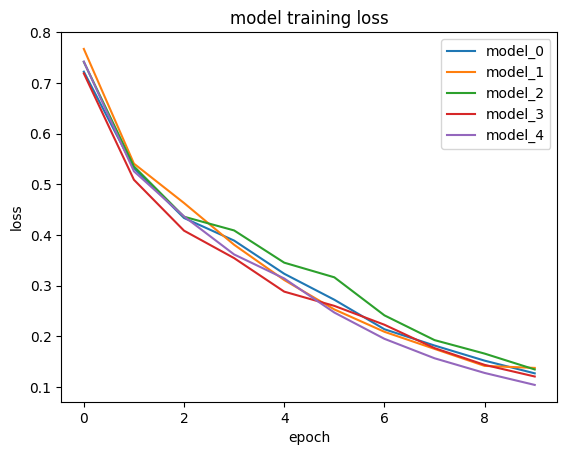

In [11]:
plt.title('model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
for key in history.keys():
    plt.plot(history[key].history['loss'], label="model_{}".format(key))
plt.legend()

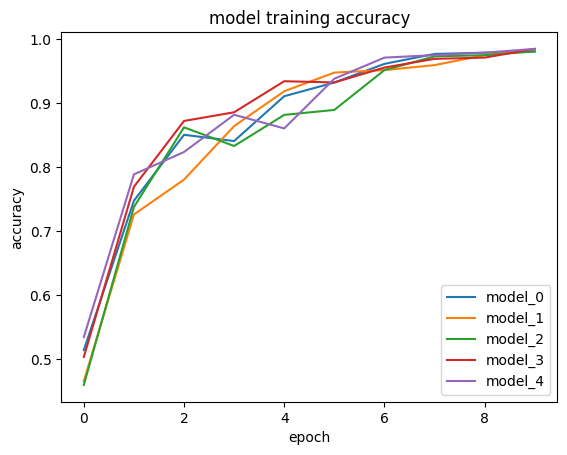

In [12]:
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
for key in history.keys():
    plt.plot(history[key].history['accuracy'], label="model_{}".format(key))
plt.legend()

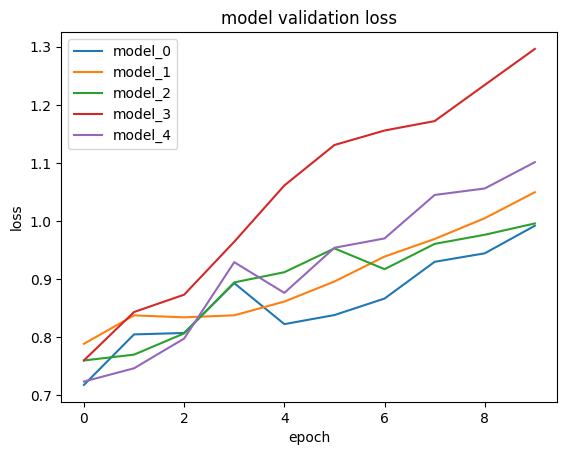

In [13]:
plt.title('model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
for key in history.keys():
    plt.plot(history[key].history['val_loss'], label="model_{}".format(key))
plt.legend()

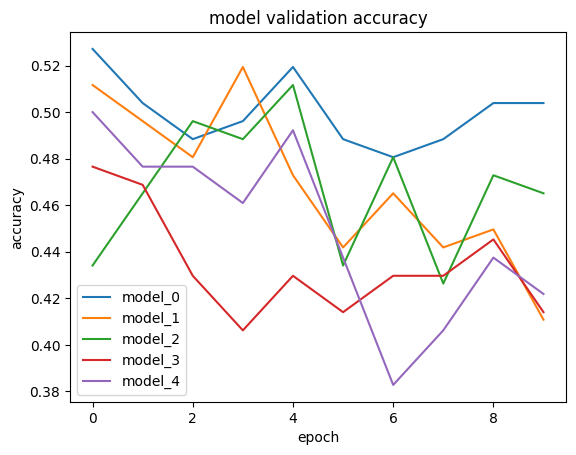

In [14]:
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
for key in history.keys():
    plt.plot(history[key].history['val_accuracy'], label="model_{}".format(key))
plt.legend()

In [15]:
print("Loss: {}, Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}".format(
    np.average(loss), np.average(accuracy), np.average(precision), np.average(recall), np.average(F1)
))

Loss: 1.0276103496551514, Accuracy: 0.4645962715148926, Precision: 0.5500740528106689, Recall: 0.496842098236084, F1 Score: 0.5206238026927335


In [16]:
# best_model.save("CNN_FAKES")

In [17]:
data = [{'Loss': round(np.average(loss), 3), 'Accuracy': round(np.average(accuracy), 3), 'Precision': round(np.average(precision), 3),
         'Recall': round(np.average(recall), 3), 'F1 Score': round(np.average(F1), 3)},
        ]
df = pd.DataFrame(data)

In [18]:
dir = os.getcwd()
print(dir)

C:\Users\cobra\project\project\model


In [19]:
change_dir = os.path.dirname(dir)
subdir = "results"
dir_path = os.path.join(change_dir, subdir)
print(dir_path)

C:\Users\cobra\project\project\results


In [20]:
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
    print(f"Created directory {dir_path}")
else:
    print(f"Directory {dir_path} already exists")

Created directory C:\Users\cobra\project\project\results


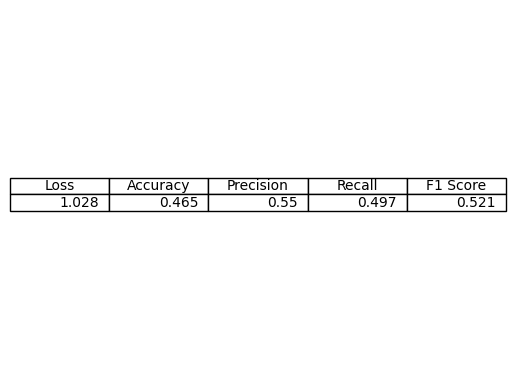

In [21]:
# Create a figure and plot the DataFrame as a table
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

# Save the figure as a PNG image
plt.savefig('../results/cnn_fakes_result.png')